In [35]:
import logging
import numpy as np

import matplotlib.pyplot as plt

from ase.io import read
from pathlib import Path

from m_ff.interpolation import Spline1D, Spline3D
from m_ff.calculators import TwoBodySingleSpecies, ThreeBodySingleSpecies

logging.basicConfig(level=logging.INFO)

In [36]:
directory = Path('test/data/Fe_vac')

print('========== Load trajectory ==========')

filename = directory / 'movie.xyz'
traj = read(str(filename), index=slice(0, 5))

========== Load trajectory ==========


In [40]:
print('========== TwoBodySingleSpecies ==========')

# future: TwoBodySingleSpecies.from_json(directory / 'test.json')
rs, element1, _, grid_data_1_1, _ = np.load(str(directory / 'MFF_2b_ntr_10_sig_1.00_cut_4.45.npy'))
grid_1_1 = Spline1D(rs, grid_data_1_1)

calc = TwoBodySingleSpecies(r_cut=3.7, grid_1_1=grid_1_1)

atoms = traj[0]
atoms.set_calculator(calc)

rms = np.sqrt(np.sum(np.square(atoms.arrays['force'] - atoms.get_forces()), axis=1))
print('MAEF on forces: {:.4f} +- {:.4f}'.format(np.mean(rms), np.std(rms)))
print(atoms.get_potential_energy())

print('========== Calculate MAEF for each steps ==========')

for atoms in traj:
    atoms.set_calculator(calc)

    rms = np.sqrt(np.sum(np.square(atoms.arrays['force'] - atoms.get_forces()), axis=1))
    print('MAEF on forces: {:.4f} +- {:.4f}'.format(np.mean(rms), np.std(rms)))
    print('energy: {}'.format(atoms.get_potential_energy()))

INFO:m_ff.calculators:numbers is in system_changes
INFO:m_ff.calculators:initialize


========== TwoBodySingleSpecies ==========
MAEF on forces: 0.9893 +- 0.4852
860.9655406389996
========== Calculate MAEF for each steps ==========
MAEF on forces: 0.9893 +- 0.4852
energy: 860.9655406389996
MAEF on forces: 0.9742 +- 0.4746
energy: 861.0317531962813
MAEF on forces: 0.9606 +- 0.4629
energy: 861.0882201884568
MAEF on forces: 0.9491 +- 0.4495
energy: 861.125175615536
MAEF on forces: 0.9418 +- 0.4332
energy: 861.1524326380268


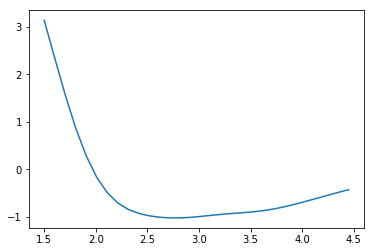

In [43]:
plt.plot(rs, -grid_data_1_1)

In [53]:
print('========== ThreeBodySingleSpecies ==========')

# future: TwoBodySingleSpecies.from_json(directory / 'test.json')
rs, element1, _, _, grid_data_1_1_1 = np.load(str(directory / 'MFF_3b_ntr_10_sig_1.00_cut_4.45.npy'))
# rs, element1, _, _, grid_data_1_1_1 = np.load(str(directory / 'MFF_3b_ntr_20_sig_1.00_cut_4.45.npy'))
grid_1_1_1 = Spline3D(rs, rs, rs, grid_data_1_1_1)

calc = ThreeBodySingleSpecies(r_cut=3.7, grid_1_1_1=grid_1_1_1)

atoms = traj[0]
atoms.set_calculator(calc)

rms = np.sqrt(np.sum(np.square(atoms.arrays['force'] - atoms.get_forces()), axis=1))
print('MAEF on forces: {:.4f} +- {:.4f}'.format(np.mean(rms), np.std(rms)))
print(atoms.get_potential_energy())

print('========== Calculate MAEF for each steps ==========')

for atoms in traj:
    atoms.set_calculator(calc)

    rms = np.sqrt(np.sum(np.square(atoms.arrays['force'] - atoms.get_forces()), axis=1))
    print('MAEF on forces: {:.4f} +- {:.4f}'.format(np.mean(rms), np.std(rms)))
    print('energy: {}'.format(atoms.get_potential_energy()))


INFO:m_ff.calculators:numbers is in system_changes
INFO:m_ff.calculators:initialize


========== ThreeBodySingleSpecies ==========
MAEF on forces: 20365.7662 +- 9385.6598
-3056659.000264844
========== Calculate MAEF for each steps ==========
MAEF on forces: 20365.7662 +- 9385.6598
energy: -3056659.000264844
MAEF on forces: 20352.8965 +- 9317.8726
energy: -3054539.971189826
MAEF on forces: 20307.5909 +- 9229.8828
energy: -3054210.657407379
MAEF on forces: 20261.9826 +- 9146.5965
energy: -3053729.815328974
MAEF on forces: 20235.5124 +- 9049.7248
energy: -3053171.188406065


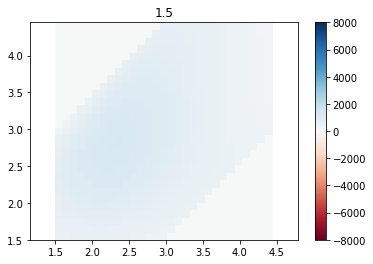

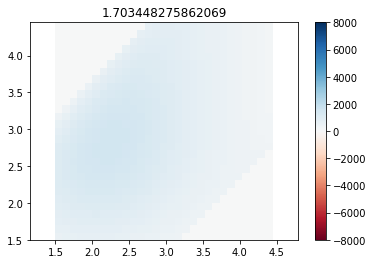

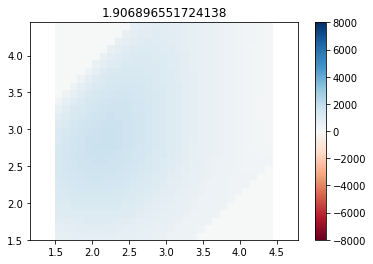

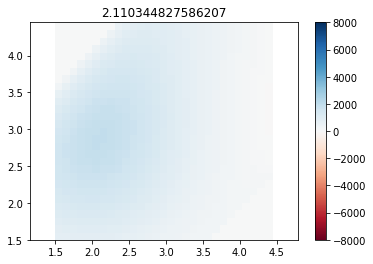

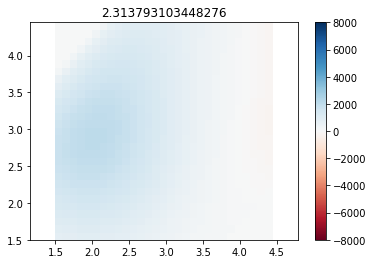

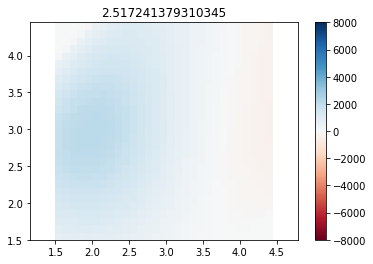

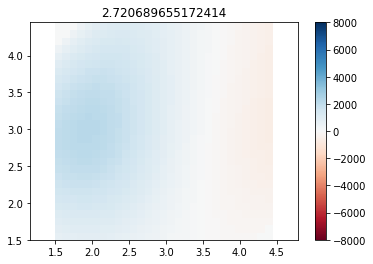

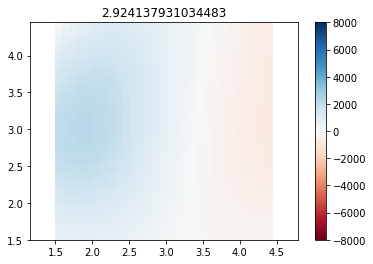

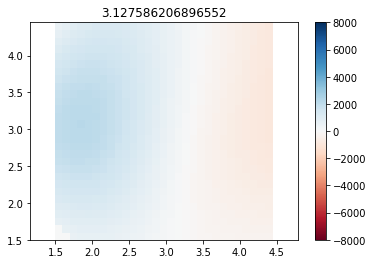

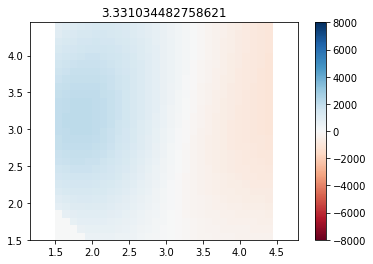

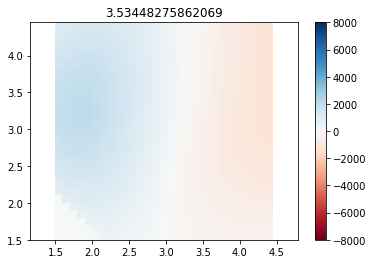

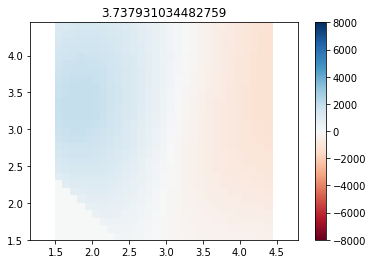

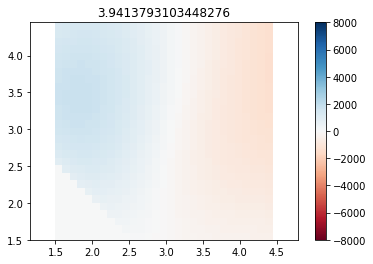

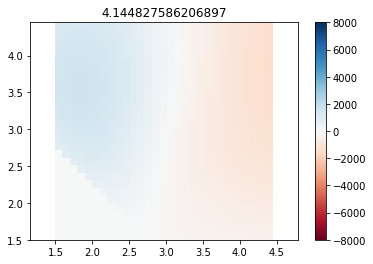

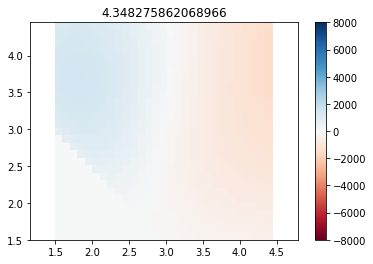

In [54]:
z_min, z_max = -8000, 8000
for i in range(0, len(rs), 2):
    plt.title(rs[i])
    plt.pcolor(rs, rs, -grid_data_1_1_1[i,:,:], cmap='RdBu', vmin=z_min, vmax=z_max)
    plt.colorbar()
    plt.axis('equal')

    plt.show()
